In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import string as str
import os
from dotenv import load_dotenv  
load_dotenv('c:/Users/tunchiie/Documents/Data Projects/GenreGenie/var.env')
%matplotlib inline

In [2]:
api_key = os.getenv("KEY")
base_url = "https://api.themoviedb.org/3"
pages = 200
movies_db = []

## Data Collecting

In [3]:
def get_popular_movies(page=1):

    url = f"{base_url}/movie/popular?api_key={api_key}&language=en-US&page={page}"

    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[ERROR] Failed to fetch page {page}: {e}")
        return []
    
for page in range(1, pages+1):
    movies = get_popular_movies(page)
    if 'results' in movies:
        #store each page in a database
        movies_db.extend(movies['results'])

movies_db = pd.DataFrame(movies_db)

In [4]:
movies_db.head(5)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/gsQJOfeW45KLiQeEIsom94QPQwb.jpg,"[28, 53]",1125899,en,Cleaner,When a group of radical activists take over an...,547.0493,/2KIqFpvjVI6mNBTQw7MYZdzRYvs.jpg,2025-02-19,Cleaner,False,6.658,117
1,False,/m2mzlsJjE3UAqeUB5fLUkpWg4Iq.jpg,"[53, 878]",1165067,en,Cosmic Chaos,"Battles in virtual reality, survival in a post...",508.2923,/mClzWv7gBqgXfjZXp49Enyoex1v.jpg,2023-08-03,Cosmic Chaos,False,5.735,17
2,False,/8eifdha9GQeZAkexgtD45546XKx.jpg,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,425.1221,/pzIddUEMWhWzfvLI3TwxUG2wGoi.jpg,2025-02-12,Captain America: Brave New World,False,6.093,1154
3,False,/ibF5XVxTzf1ayzZrmiJqgeQ39Qk.jpg,"[28, 10752]",1373723,en,The Codes of War,"War stories about family, ethics and honor inc...",416.4710,/oXeiQAfRK90pxxhP5iKPXQqAIN1.jpg,2025-03-20,The Codes of War,False,6.542,12
4,False,/is9bmV6uYXu7LjZGJczxrjJDlv8.jpg,"[28, 12]",1229730,fr,Carjackers,"By day, they're invisible—valets, hostesses, a...",398.4515,/mtYwRRc7fKt16o0qZJxmBptcdzT.jpg,2025-03-27,Carjackers,False,6.800,21


In [5]:
movies_db.describe()

,id,popularity,vote_average,vote_count
count,4.000000e+03,4000.000000,4000.000000,4000.000000
mean,4.341416e+05,10.029153,6.511503,3362.130500
std,4.488470e+05,22.679728,1.425773,4597.820353
min,1.100000e+01,2.862100,0.000000,0.000000
25%,1.175575e+04,4.256700,6.100000,143.000000
50%,2.960985e+05,5.817100,6.710500,1755.000000
75%,8.120840e+05,8.916725,7.300000,4585.500000
max,1.450436e+06,547.049300,10.000000,37266.000000


In [6]:
# Drop columns
to_drop = ['adult', 'backdrop_path', 'poster_path', 'video', 'title']
movies_db.drop(to_drop, axis = 1, inplace = True)

# Rename columns
movies_db.rename(columns = {'original_language':'language', 'original_title' :'title'},inplace = True)

In [7]:
#check if there are any null values that need to be cleaned
movies_db.isnull().sum()

genre_ids       0
id              0
language        0
title           0
overview        0
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

In [8]:
# drop all row with duplicate movies or if no title or id has been assigned
movies_db.drop_duplicates(subset='title',inplace=True)
movies_db.dropna(subset=['title', 'id'], how='all', inplace=True)

In [9]:
# fill all empty values for each movie
movies_db.fillna('')

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count
0,"[28, 53]",1125899,en,Cleaner,When a group of radical activists take over an...,547.0493,2025-02-19,6.658,117
1,"[53, 878]",1165067,en,Cosmic Chaos,"Battles in virtual reality, survival in a post...",508.2923,2023-08-03,5.735,17
2,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,425.1221,2025-02-12,6.093,1154
3,"[28, 10752]",1373723,en,The Codes of War,"War stories about family, ethics and honor inc...",416.4710,2025-03-20,6.542,12
4,"[28, 12]",1229730,fr,Carjackers,"By day, they're invisible—valets, hostesses, a...",398.4515,2025-03-27,6.800,21
...,...,...,...,...,...,...,...,...,...
3995,"[18, 36, 10752]",17277,en,The Fall of the Roman Empire,In the year 180 A.D. Germanic tribes are about...,3.3848,1964-03-24,6.500,202
3996,"[28, 53, 10749, 12]",44918,en,Titanic II,On the 100th anniversary of the original voyag...,3.3832,2010-08-07,5.000,426
3997,"[18, 14, 9648, 53]",500840,en,I'm Thinking of Ending Things,Nothing is as it seems when a woman experienci...,3.3829,2020-08-28,6.577,1990
3998,"[28, 53, 10770]",1115396,en,Hunting Games,When a group of ex-military members is hired t...,3.3827,2023-05-12,4.295,22


In [10]:
# convert release date to datetime to assign year and month
movies_db['release_date'] = pd.to_datetime(movies_db['release_date'], format='%Y-%m-%d', errors='coerce')
movies_db['release_month'] = movies_db['release_date'].dt.month_name()
movies_db['release_year'] = movies_db['release_date'].dt.year

In [11]:
# check which rows have an assigned year
movies_db.fillna({'release_year' : 0.0}, inplace=True)

In [12]:
# convert year assigned to integer type
movies_db['release_year'] = movies_db['release_year'].apply(lambda x : int(x) if isinstance(x, float) else x)

In [ ]:
url = "https://api.themoviedb.org/3/genre/movie/list?language=en"

headers = {
    "accept": "application/json",
    "Authorization": F'Bearer {os.getenv('BEARER_TOKEN')}'
}

try:
    response = requests.get(url, headers=headers)
    
    response.raise_for_status()
    
    genre_dict = pd.DataFrame(response.json()['genres'] )
    
    genre_dict.set_index('id', inplace=True)
except requests.RequestException as e:
    print(f"[ERROR] Failed to fetch genres: {e}")

In [65]:
genre_dict.loc[28]

name    Action
Name: 28, dtype: object

In [69]:
def find_genre(genre_list=[]):
    return [genre_dict.loc[gid]['name'] for gid in genre_list]

In [70]:
#populate genre names using their corresponding id's
movies_db['genre'] = movies_db['genre_ids'].apply(find_genre)

In [71]:
movies_db.head()

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,"[28, 53]",1125899,en,Cleaner,When a group of radical activists take over an...,547.0493,2025-02-19,6.658,117,February,2025,"[Action, Thriller]"
1,"[53, 878]",1165067,en,Cosmic Chaos,"Battles in virtual reality, survival in a post...",508.2923,2023-08-03,5.735,17,August,2023,"[Thriller, Science Fiction]"
2,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,425.1221,2025-02-12,6.093,1154,February,2025,"[Action, Thriller, Science Fiction]"
3,"[28, 10752]",1373723,en,The Codes of War,"War stories about family, ethics and honor inc...",416.4710,2025-03-20,6.542,12,March,2025,"[Action, War]"
4,"[28, 12]",1229730,fr,Carjackers,"By day, they're invisible—valets, hostesses, a...",398.4515,2025-03-27,6.800,21,March,2025,"[Action, Adventure]"


In [ ]:
#get the most popular movies
today = pd.to_datetime(pd.Timestamp.today(), format='%Y-%m-%d', errors='coerce')
most_popular = movies_db[(movies_db['popularity'] > 10) == True].copy()

In [ ]:
most_popular.head()

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,"[28, 53]",1125899,en,Cleaner,When a group of radical activists take over an...,547.0493,2025-02-19,6.658,117,February,2025,"[Action, Thriller]"
1,"[53, 878]",1165067,en,Cosmic Chaos,"Battles in virtual reality, survival in a post...",508.2923,2023-08-03,5.735,17,August,2023,"[Thriller, Science Fiction]"
2,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,425.1221,2025-02-12,6.093,1154,February,2025,"[Action, Thriller, Science Fiction]"
3,"[28, 10752]",1373723,en,The Codes of War,"War stories about family, ethics and honor inc...",416.4710,2025-03-20,6.542,12,March,2025,"[Action, War]"
4,"[28, 12]",1229730,fr,Carjackers,"By day, they're invisible—valets, hostesses, a...",398.4515,2025-03-27,6.800,21,March,2025,"[Action, Adventure]"


##### Top 5 Genres Overall

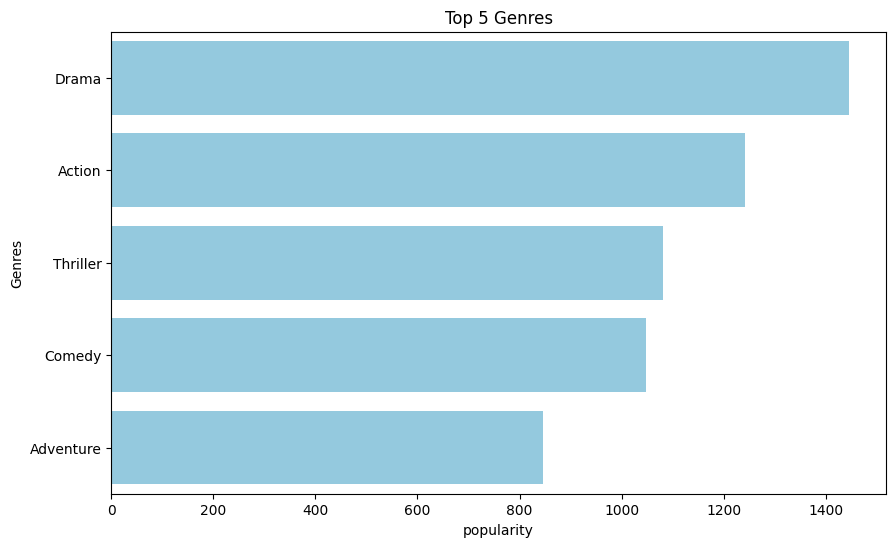

In [ ]:
plt.figure(figsize=(10, 6))
exploded_genres = movies_db.explode('genre', ignore_index=True)
genre_frequency = exploded_genres['genre'].value_counts()
top_genres = genre_frequency.head(5)
sns.barplot(x=top_genres.values, y=top_genres.index, orient ='h', color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

##### Top 5 Genres from Popular Movies

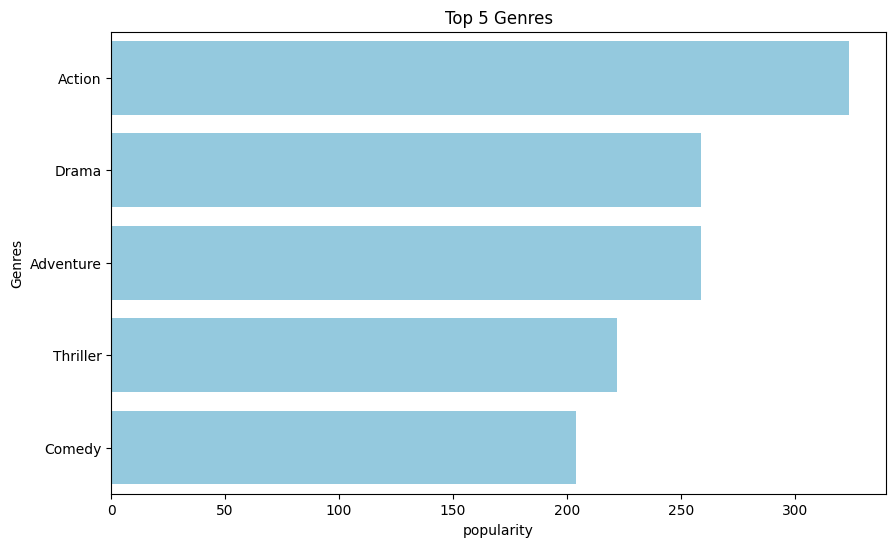

In [ ]:
plt.figure(figsize=(10, 6))
exploded_genres = most_popular.explode('genre', ignore_index=True)
genre_frequency = exploded_genres['genre'].value_counts()
top_genres = genre_frequency.head(5)
sns.barplot(x=top_genres.values, y=top_genres.index, orient ='h', color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

In [ ]:
target_genres = {}
def contains_target_genres(genre_list):
    # Make sure the list of genres required are in the right format
    new_target_genres = set(genre.capitalize() for genre in target_genres)
    return new_target_genres.issubset(set(genre_list))

In [ ]:
def contains_some_target_genres(genres):
    # Make sure the list of genres required are in the right format
    new_target_genres = set(genre.capitalize() for genre in target_genres)
    return any(item in genres for item in new_target_genres)

In [ ]:
target_genres = set(top_genres.index)
is_target = pd.DataFrame(movies_db['genre'].apply(contains_some_target_genres))
top_movies = movies_db[is_target['genre'] == True].copy()  
top_movies['genre'] = top_movies['genre'].apply(lambda x: [genre.capitalize() \
                                                           for genre in x if genre.capitalize() in target_genres])
top_movies = top_movies.explode('genre')
grouped_year = pd.DataFrame(top_movies.groupby(['release_year', 'genre'], as_index=False)['title'].count())
grouped_year.rename({'title':'count'}, axis=1, inplace=True)

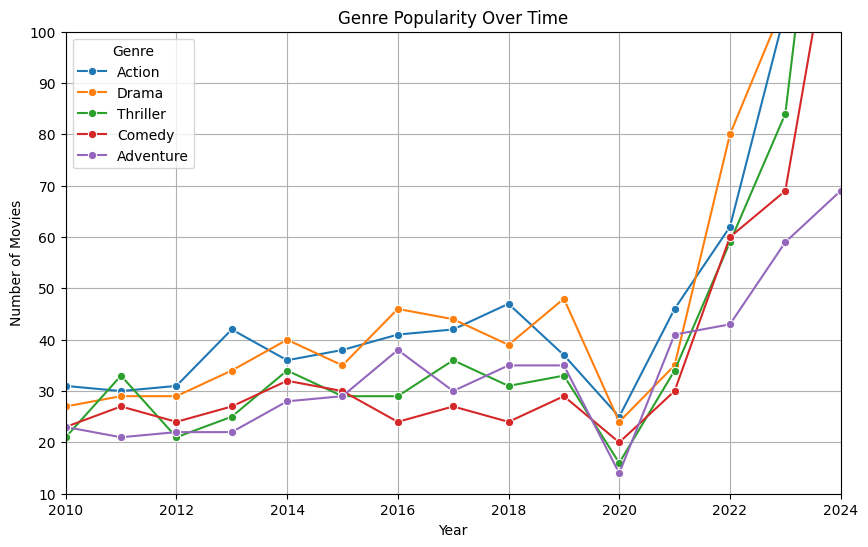

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_year, x="release_year", y="count", hue="genre", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Genre Popularity Over Time")
plt.legend(title="Genre")
plt.xlim(2010, 2024)
plt.ylim(10,100)
plt.grid(True)
plt.show()

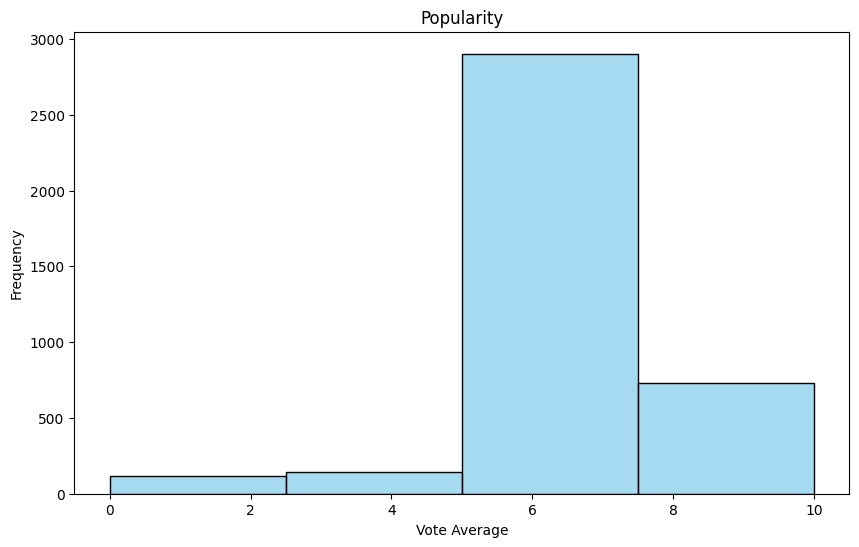

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_db, x='vote_average', bins=4, color='skyblue')
plt.title('Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [ ]:
hidden_gems = movies_db[(movies_db['popularity'] < 10) & (movies_db['vote_average'] > 8.5)].copy()
hidden_gems = hidden_gems.explode('genre')
hidden_gems = hidden_gems.sort_values(by='vote_average', ascending=False)
group_hidden = hidden_gems.groupby(['genre'], as_index=False)['title'].count()

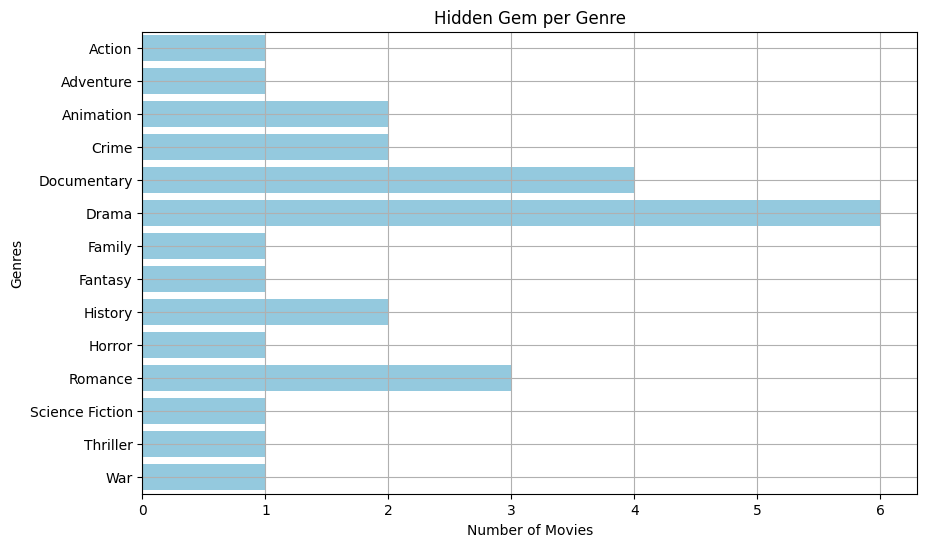

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_hidden, x='title', y='genre', orient ='h', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Hidden Gem per Genre')
plt.grid(True)
plt.show()

## Movie Recommendations

In [ ]:
target_genres = {'Action', 'Romance'}
is_target = pd.DataFrame(movies_db['genre'].apply(contains_target_genres))
target_movies = movies_db[is_target['genre'] == True].copy()
print('\033[1m' + 'Recommended Movies based on Genre: ' + '\033[0m')
for n, title in enumerate(target_movies['title'], start=1):
    print(f'{n}. {title}')

Recommended Movies based on Genre: 
1. Love Hurts
2. धूम धाम
3. Maleficent
4. The Fall Guy
5. Miraculous - le film
6. Ghosted
7. Love Lies Bleeding
8. Virgin Territory
9. Libre
10. Pearl Harbor
11. Legends of the Fall
12. Lifeforce
13. THE LAST -NARUTO THE MOVIE-
14. Scott Pilgrim vs. the World
15. The Karate Kid Part II
16. A Knight's Tale
17. পাগলু ২
18. 卧虎藏龍
19. るろうに剣心 最終章 The Beginning
20. సుప్రీమ్
21. Role Play
22. One Fast Move
23. Allied
24. Alexander
25. Marching Powder
26. True Romance
27. The Last of the Mohicans
28. 墮落天使
29. The Bodyguard
30. The Quick and the Dead
31. The Tourist
32. Romancing the Stone
33. This Means War


In [ ]:
new_db = movies_db.copy()
new_db.reset_index()
new_db['genre'] = new_db['genre'].apply( ', '.join)
new_db.head()

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,"[28, 53]",1125899,en,Cleaner,When a group of radical activists take over an...,547.0493,2025-02-19,6.658,117,February,2025,"Action, Thriller"
1,"[53, 878]",1165067,en,Cosmic Chaos,"Battles in virtual reality, survival in a post...",508.2923,2023-08-03,5.735,17,August,2023,"Thriller, Science Fiction"
2,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,425.1221,2025-02-12,6.093,1154,February,2025,"Action, Thriller, Science Fiction"
3,"[28, 10752]",1373723,en,The Codes of War,"War stories about family, ethics and honor inc...",416.4710,2025-03-20,6.542,12,March,2025,"Action, War"
4,"[28, 12]",1229730,fr,Carjackers,"By day, they're invisible—valets, hostesses, a...",398.4515,2025-03-27,6.800,21,March,2025,"Action, Adventure"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Fill NaN values with empty strings to avoid errors
tfidf_matrix = tfidf.fit_transform(new_db['overview'].fillna(""))

genre_features = pd.DataFrame(tfidf_matrix.toarray(), index=new_db.index)

# Compute similarity between movies
cosine_sim = cosine_similarity(genre_features)

def get_recommendation(title, db, n=5, cosine_sim=cosine_sim):
    if title not in db["title"].values:
        return "Movie not found in database."
    
    # Get the index of the selected movie
    movie_index = db[db['title'] == title].index[0]
    
    # Get similarity scores & sort
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar movies that are hidden gems
    similar_movies = [db.iloc[i]['title'] for i, score in sim_scores if i != movie_index]
    
    return similar_movies[:n]

title = movies_db.loc[0, 'title']
recs = get_recommendation(title, db=new_db)

# Check if the recommendation is a list of movies
if (isinstance(recs, type([]))):
    # Display the recommended movies
    print('\033[1m' + f'Recommended Movies Similar to {title}: ' + '\033[0m')
    for n, title in enumerate(recs, start=1):
        print(f'{n}. {title}')
else:
    print(recs)

Recommended Movies Similar to Cleaner: 
1. Ocean's Eight
2. Wake Up
3. Time Trap
4. Hell or High Water
5. Lights Out


In [ ]:
updated_db = movies_db.copy()
updated_db.drop(['popularity', 'vote_average'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_encoder = MultiLabelBinarizer(sparse_output=False)

genre_matrix = mlb_encoder.fit_transform(movies_db['genre'])
encoded_db = pd.concat([updated_db.copy(), pd.DataFrame(genre_matrix).copy()], axis=1)
encoded_db.dropna(subset=['title', 'id'], how='all', inplace=True)

## Predict Genres using overview

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
encoded_db['overview'] = encoded_db['overview'].fillna("")
tfidf_matrix = vectorizer.fit_transform(encoded_db['overview'])

In [ ]:
from sklearn.model_selection import train_test_split
genre_matrix = genre_matrix[~np.isnan(genre_matrix).any(axis=1)]
new_matrix = tfidf_matrix[~np.isnan(genre_matrix).any(axis=1)]
X_train, X_test, y_train, y_test = train_test_split(new_matrix, genre_matrix, test_size=0.2, random_state=1)

In [ ]:

index= 1
prob_threshold = 0.25

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


classifier = MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=1000)))
classifier.fit(X_train, y_train)

def predict_genres(movie_overview):

    # Check if the input is a string and not empty
    if pd.isna(movie_overview) or not isinstance(movie_overview, type('')) or movie_overview.strip() == '':
        return ['Unknown']  # Handle empty or null cases
    
    overview_tfidf = vectorizer.transform([movie_overview])

    predicted = classifier.predict(overview_tfidf)
    
    if predicted.sum() == 0:
        predicted[0, np.argmax(y_train.sum(axis=0))] = 1 #assign the most common genre if model finds no patterns
    return mlb_encoder.inverse_transform(predicted)[0]
print(f' Predicted Genres: {predict_genres(encoded_db.loc[index, "overview"])} \n Real Genres:  {encoded_db.loc[index, "genre"]}')

 Predicted Genres: ('Drama',) 
 Real Genres:  ['Thriller', 'Science Fiction']


#### The Probability for each genre after going through the model is quite low due to Drama being the most frequent genre so the argument class weight is set to balanced to replicate the infrequent class until there's as many samples as the more frequent one. In addition, the probability threshold is increased to increase accuracy.

In [ ]:
classifier = MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(solver="lbfgs", class_weight='balanced', max_iter=1000)))
prob_threshold = 0.5
classifier.fit(X_train, y_train)
print(f' Predicted Genres: {predict_genres(encoded_db.loc[index, "overview"])} \n Real Genres:  {encoded_db.loc[index, "genre"]}')

 Predicted Genres: ('Action', 'Science Fiction', 'Thriller') 
 Real Genres:  ['Thriller', 'Science Fiction']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb_encoder.classes_, zero_division=0))

                 precision    recall  f1-score   support

         Action       0.68      0.69      0.69       239
      Adventure       0.54      0.52      0.53       163
      Animation       0.55      0.48      0.51        96
         Comedy       0.53      0.54      0.54       208
          Crime       0.57      0.46      0.51       112
    Documentary       0.00      0.00      0.00        10
          Drama       0.64      0.64      0.64       294
         Family       0.63      0.51      0.56       100
        Fantasy       0.57      0.41      0.48       118
        History       0.36      0.21      0.26        24
         Horror       0.69      0.56      0.62       132
          Music       0.50      0.10      0.17        10
        Mystery       0.46      0.33      0.38        67
        Romance       0.63      0.56      0.60       117
Science Fiction       0.67      0.60      0.64       106
       TV Movie       0.00      0.00      0.00         3
       Thriller       0.60    

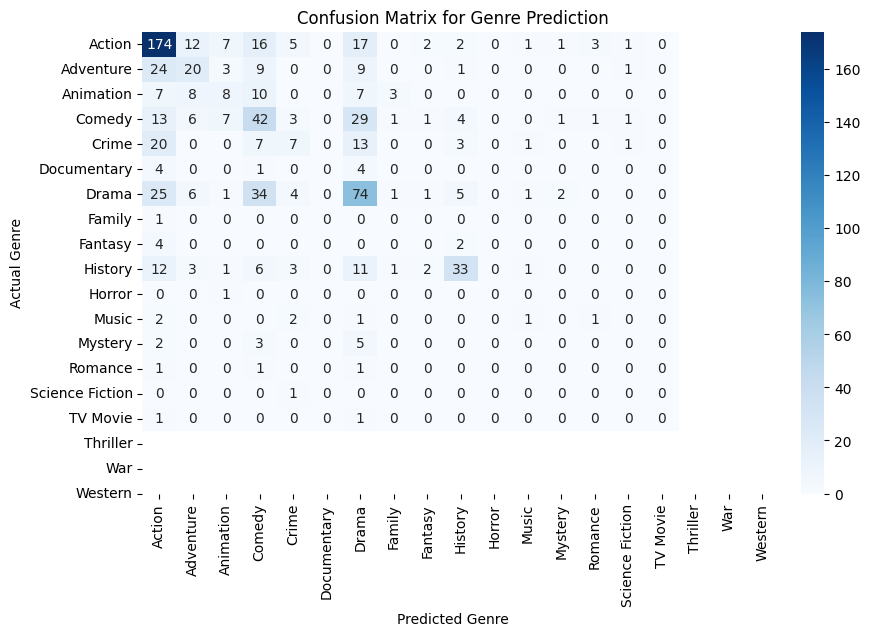

In [ ]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mlb_encoder.classes_, yticklabels=mlb_encoder.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix for Genre Prediction")
plt.show()

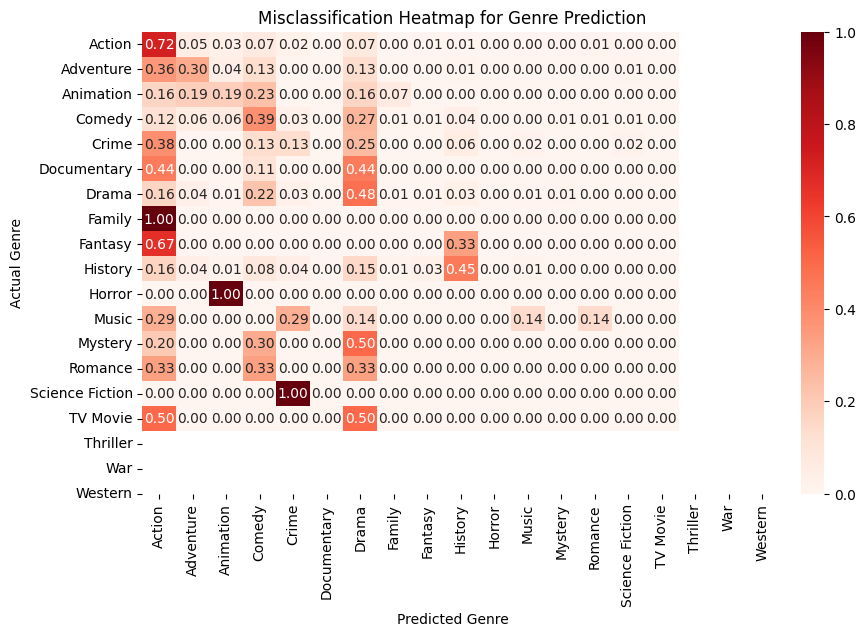

In [ ]:
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Reds", xticklabels=mlb_encoder.classes_, yticklabels=mlb_encoder.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Misclassification Heatmap for Genre Prediction")
plt.show()

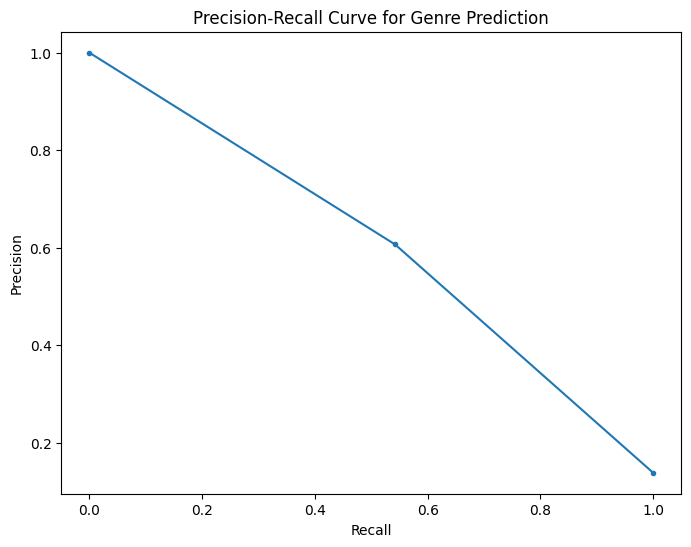

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
from sklearn.metrics import precision_recall_curve
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
sns.lineplotplot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Genre Prediction")
plt.show()